In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys
# Create directory to save TensorBoard logs
#SAVE_DIR = "model_logs"

In [3]:
train_df = pd.read_csv("/content/Dataset-SA.csv")
train_df2=train_df
train_df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


In [4]:
len(train_df)

205052

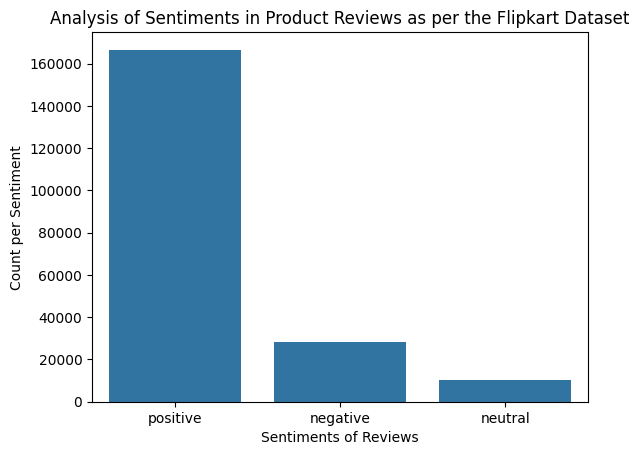

In [5]:
# Check distribution of sentiments - positive and negative reviews
sns.countplot(x=train_df['Sentiment'], data=train_df)
plt.title('Analysis of Sentiments in Product Reviews as per the Flipkart Dataset')
plt.ylabel("Count per Sentiment")
plt.xlabel("Sentiments of Reviews")
plt.savefig('sentiment.png')
plt.show()


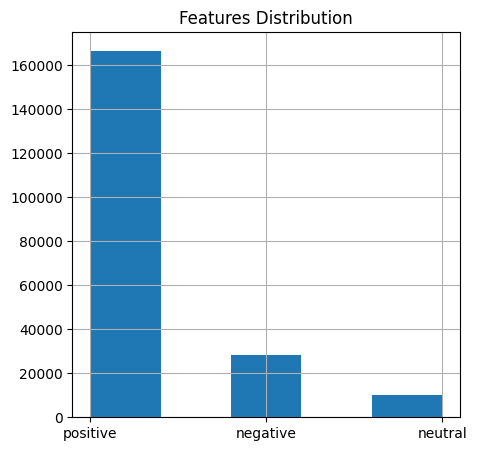

In [6]:
# Check the distribution of all the features.
# Here we have only one feature i.e. sentiment so plotting the different sentiments

train_df['Sentiment'].hist(figsize=(5,5),bins = 5)
plt.title("Features Distribution")
plt.show()

In [7]:
train_df['Summary']

,Summary
0,great cooler excellent air flow and for this p...
1,best budget 2 fit cooler nice cooling
2,the quality is good but the power of air is de...
3,very bad product its a only a fan
4,ok ok product
...,...
205047,good product
205048,nice
205049,very nice and fast delivery
205050,awesome product


In [8]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
193551,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
149083,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
194975,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
29981,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
137259,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive


In [9]:
# How many examples of each class?
train_df.Sentiment.value_counts()

,count
Sentiment,
positive,166581
negative,28232
neutral,10239


In [10]:
train_df['Summary'] = train_df['Summary'].astype(str)
train_df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [11]:
'''
Preprocessing Pipeline to remove html tags, special characters, stopwords
'''
import re
import nltk
nltk.download('stopwords')

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet, stopwords
import string
stopwords_list = stopwords.words('english')
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)

    return text


#Define function for removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Stemming the text
def simple_stemmer(sentence):
    ps=nltk.porter.PorterStemmer()
    sentence_words = nltk.word_tokenize(sentence)
    filtered_tokens= [ps.stem(word) for word in sentence_words]
    filtered_text= ' '.join(filtered_tokens)
    return filtered_text

# remove stop-words and punctuations
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    sentence = sentence.lower()
    tokens = sentence.split()
    filtered_tokens = [token.strip(string.punctuation) for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Lemmetize the text
def word_lemmetize(sentence):
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence_words = nltk.word_tokenize(sentence)

    filtered_tokens = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in sentence_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [12]:
train_df['Summary']=train_df['Summary'].apply(remove_between_square_brackets)
train_df['Summary']

,Summary
0,great cooler excellent air flow and for this p...
1,best budget 2 fit cooler nice cooling
2,the quality is good but the power of air is de...
3,very bad product its a only a fan
4,ok ok product
...,...
205047,good product
205048,nice
205049,very nice and fast delivery
205050,awesome product


In [13]:
train_df['Summary']=train_df['Summary'].apply(denoise_text)
train_df['Summary']

,Summary
0,great cooler excellent air flow and for this p...
1,best budget 2 fit cooler nice cooling
2,the quality is good but the power of air is de...
3,very bad product its a only a fan
4,ok ok product
...,...
205047,good product
205048,nice
205049,very nice and fast delivery
205050,awesome product


In [14]:
train_df['Summary']=train_df['Summary'].apply(remove_special_characters)
train_df['Summary']

,Summary
0,great cooler excellent air flow and for this p...
1,best budget 2 fit cooler nice cooling
2,the quality is good but the power of air is de...
3,very bad product its a only a fan
4,ok ok product
...,...
205047,good product
205048,nice
205049,very nice and fast delivery
205050,awesome product


In [15]:
train_df['Summary']=train_df['Summary'].apply(simple_stemmer)
train_df['Summary']

,Summary
0,great cooler excel air flow and for thi price ...
1,best budget 2 fit cooler nice cool
2,the qualiti is good but the power of air is de...
3,veri bad product it a onli a fan
4,ok ok product
...,...
205047,good product
205048,nice
205049,veri nice and fast deliveri
205050,awesom product


In [16]:
train_df['Summary']=train_df['Summary'].apply(remove_stopwords)
train_df['Summary']

,Summary
0,great cooler excel air flow thi price amaz unb...
1,best budget 2 fit cooler nice cool
2,qualiti good power air decent
3,veri bad product onli fan
4,ok ok product
...,...
205047,good product
205048,nice
205049,veri nice fast deliveri
205050,awesom product


In [17]:
train_df['Summary']=train_df['Summary'].apply(word_lemmetize)
train_df.Summary.head(50)

,Summary
0,great cooler excel air flow thi price amaz unb...
1,best budget 2 fit cooler nice cool
2,qualiti good power air decent
3,veri bad product onli fan
4,ok ok product
5,cooler realli fantast provid good air flow hig...
6,veri good product
7,veri nice
8,veri bad cooler
9,veri good


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
# Segmentation of dataset into 80% training and 20% test set
train,test = train_test_split(train_df2,test_size =0.2,random_state=42)
train_x, train_y = train['Review'], train['Sentiment']
test_x, test_y = test['Review'], test['Sentiment']

In [20]:
#transformation of the data into numeric vectors using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
# Fit the model based on training data train_x
train_x_vector = tfidf.fit_transform(train_x.values.astype('U'))


# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x.values.astype('U'))

In [21]:
#features = tfidf.get_feature_names_out()
print(str(tfidf.vocabulary_)[:2000])

{'wonderful': 986, 'slightly': 832, 'disappointed': 279, 'mind': 588, 'blowing': 122, 'purchase': 718, 'nice': 620, 'product': 709, 'fabulous': 345, 'worth': 995, 'money': 602, 'useless': 944, 'expected': 337, 'better': 112, 'terrible': 899, 'just': 508, 'wow': 999, 'value': 952, 'specified': 855, 'great': 412, 'recommended': 744, 'awesome': 83, 'perfect': 668, 'penny': 664, 'nan': 610, 'really': 738, 'okay': 633, 'decent': 247, 'brilliant': 133, 'super': 880, 'poor': 689, 'highly': 451, 'best': 111, 'market': 565, 'fair': 349, 'classy': 187, 'way': 972, 'good': 406, 'does': 289, 'job': 505, 'terrific': 900, 'hated': 435, 'simply': 822, 'worthless': 997, 'worst': 994, 'experience': 340, 'buy': 149, 'quality': 725, 'delightful': 255, 'choice': 179, 'horrible': 456, 'did': 272, 'meet': 578, 'expectations': 336, 'excellent': 331, 'unsatisfactory': 932, 'utterly': 949, 'pretty': 696, 'star': 859, 'bad': 92, 'absolute': 39, 'rubbish': 777, 'moderate': 600, 'hard': 432, 'ball': 98, 'simple':

In [22]:
#train_x_vector

In [23]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,10,100,10k,10mins,11,11th,150,1599,15k,17,...,writing,wrong,xiaomi,yaar,year,years,yes,yield,yr,zero
165013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Using support vector machines (SVC)to fit the transformed vector
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [25]:
svc.predict(tfidf.transform(test_x.values.astype('U')))

array(['negative', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [26]:
print(svc.score(test_x_vector, test_y))

0.8975884518787642


In [27]:
conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = ['positive', 'negative'])

In [28]:
conf_mat


array([[33111,   310],
       [ 1857,  3700]])

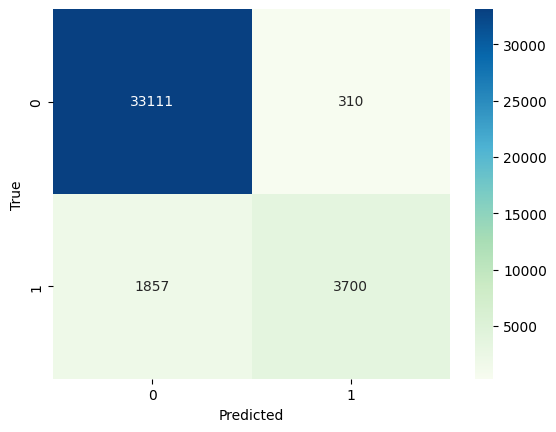

In [29]:
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, cmap='GnBu', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
# Concatenate the dataframes
train_df_test = pd.concat([test_x, test_y], axis=1)
train_df_test.head()

,Review,Sentiment
193551,worst experience ever!,neutral
149083,just wow!,positive
194975,classy product,positive
29981,simply awesome,positive
137259,simply awesome,positive


In [31]:
svc.predict(tfidf.transform([train_df_test['Review'][3948]]))

array(['negative'], dtype=object)

In [32]:
#Ploting the classification report
print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.90      0.99      0.94     33421
    negative       0.85      0.67      0.75      5557

   micro avg       0.90      0.94      0.92     38978
   macro avg       0.88      0.83      0.85     38978
weighted avg       0.90      0.94      0.92     38978

